# **Name:** Raven Charles Roy P. Jacinto

# **Course and Section:** CPE019 - CPE32S3

# **Date of Submission:** April 11, 2024

# **Instructor:** Engr. Roman Richard

# **Activity:** Assignment 7.1: Classifications and Regression

# **Choose any dataset applicable to the classification problem, and also, choose any dataset applicable to the regression problem.**

# **Explain your datasets and the problem being addressed.**

## **For classification, do the following:**

### - Create a base model

### - Evaluate the model with k-fold cross validation

### - Improve the accuracy of your model by applying additional hidden layers

## **For regression, do the following:**

### - Create a base model

### - Improve the model by standardizing the dataset

### - Show tuning of layers and neurons (see evaluating small and larger networks)

### - Submit the link to your Google Colab (make sure that it is accessible to me)


In [2]:


pip install ucimlrepo



# **CLASSIFICATION**

## **Dataset explanation and the problem being addressed:**

### **Dataset:** The dataset I have here is Hepatitis dataset from UCI machine learning repository. This dataset contains the laboratory results of patients in Pittsburgh. This dataset was arranged by Gail Gong of Carnegie-Mellon University.

### **Problem to be addressed:** The problem I want to address is the slow laboratory evaluation of determining the class of hepatitis. Through this model, I will predict the hepatitis class of patients using their initial laboratory results using neural network model and k-fold cross validation evaluator for the accuracy. I turn the results to binary for better processing, Hepatitis Class 1 = 0 and Hepatitis Class 2 = 1.

### **Importing dataset from UCI machine learning repository / Checking of data**

In [30]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
hepatitis = fetch_ucirepo(id=46)

# data (as pandas dataframes)
X = hepatitis.data.features
y = hepatitis.data.targets

# metadata
print(hepatitis.metadata)

# variable information
print(hepatitis.variables)


{'uci_id': 46, 'name': 'Hepatitis', 'repository_url': 'https://archive.ics.uci.edu/dataset/46/hepatitis', 'data_url': 'https://archive.ics.uci.edu/static/public/46/data.csv', 'abstract': 'From G.Gong: CMU; Mostly Boolean or numeric-valued attribute types; Includes cost data (donated by Peter Turney)', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 155, 'num_features': 19, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1983, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5Q59J', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': 'Please ask Gail Gong for further information on this database.', 'purpose': None, 'funded_by': None, 'instances_represent': None, 'recommended_data_splits': None, 'sensitive_data': None, 'preprocessing_descri

In [31]:
X.info()
print('\n')
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              155 non-null    int64  
 1   Sex              155 non-null    int64  
 2   Steroid          154 non-null    float64
 3   Antivirals       155 non-null    int64  
 4   Fatigue          154 non-null    float64
 5   Malaise          154 non-null    float64
 6   Anorexia         154 non-null    float64
 7   Liver Big        145 non-null    float64
 8   Liver Firm       144 non-null    float64
 9   Spleen Palpable  150 non-null    float64
 10  Spiders          150 non-null    float64
 11  Ascites          150 non-null    float64
 12  Varices          150 non-null    float64
 13  Bilirubin        149 non-null    float64
 14  Alk Phosphate    126 non-null    float64
 15  Sgot             151 non-null    float64
 16  Albumin          139 non-null    float64
 17  Protime         

In [32]:
X.shape

(155, 19)

In [33]:
y.shape

(155, 1)

In [34]:
X.head()

,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology
0,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1


In [35]:
y.head()

,Class
0,2
1,2
2,2
3,2
4,2


In [36]:
X.dtypes

Age                  int64
Sex                  int64
Steroid            float64
Antivirals           int64
Fatigue            float64
Malaise            float64
Anorexia           float64
Liver Big          float64
Liver Firm         float64
Spleen Palpable    float64
Spiders            float64
Ascites            float64
Varices            float64
Bilirubin          float64
Alk Phosphate      float64
Sgot               float64
Albumin            float64
Protime            float64
Histology            int64
dtype: object

In [37]:
X.isnull().sum()

Age                 0
Sex                 0
Steroid             1
Antivirals          0
Fatigue             1
Malaise             1
Anorexia            1
Liver Big          10
Liver Firm         11
Spleen Palpable     5
Spiders             5
Ascites             5
Varices             5
Bilirubin           6
Alk Phosphate      29
Sgot                4
Albumin            16
Protime            67
Histology           0
dtype: int64

In [38]:
y.isnull().sum()

Class    0
dtype: int64

## **Preprocessing / Feature Engineering**

In [ ]:
# Fill missing values in each column with the mean or median of a specific column
X.fillna({
    'Steroid': X['Steroid'].mean(),
    'Malaise': X['Malaise'].median(),
    'Fatigue': X['Fatigue'].median(),
    'Anorexia': X['Anorexia'].median(),
    'Liver Big': X['Liver Big'].median(),
    'Liver Firm': X['Liver Firm'].median(),
    'Spleen Palpable': X['Spleen Palpable'].median(),
    'Spiders': X['Spiders'].median(),
    'Ascites': X['Ascites'].median(),
    'Varices': X['Varices'].median(),
    'Bilirubin': X['Bilirubin'].median(),
    'Alk Phosphate': X['Alk Phosphate'].median(),
    'Sgot': X['Sgot'].median(),
    'Albumin': X['Albumin'].median(),
    'Protime': X['Protime'].median()
}, inplace=True)

In [40]:
X.isnull().sum()

Age                0
Sex                0
Steroid            0
Antivirals         0
Fatigue            0
Malaise            0
Anorexia           0
Liver Big          0
Liver Firm         0
Spleen Palpable    0
Spiders            0
Ascites            0
Varices            0
Bilirubin          0
Alk Phosphate      0
Sgot               0
Albumin            0
Protime            0
Histology          0
dtype: int64

In [43]:
# Converting 1 to 0, and 2 to 1 for better data processing
y.loc[:, 'Class'] = y['Class'].apply(lambda x: 0 if x == 1 else 1)

y

,Class
0,1
1,1
2,1
3,1
4,1
...,...
150,0
151,1
152,1
153,1


### **Dataset evaluation:** Upon checking, I found out that there are existing null values that is why I fill it with the mean values. The class also is stated as 1 and 2, I converted it to 0 and 1. There are 155 rows, there are total of 20 columns (19 for input varialbes and 1 for target variable). The listed data are all in int64 and float 32 form.

In [ ]:
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import Adam
import numpy as np

# Base Model
def create_base_model(input_dim, learning_rate=0.001):
    optimizer = Adam(learning_rate=learning_rate)
    model = models.Sequential([
        layers.Dense(units=64, activation='relu', input_dim=input_dim),
        layers.Dense(units=2, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Creating k-fold cross-validator
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=52)

# Initializing lists to store accuracy scores
base_model_scores = []

# Performing k-fold cross-validation for base model
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Creating and training base model with learning rate 0.001
    base_model = create_base_model(input_dim=X_train.shape[1])
    base_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

    # Evaluating base model
    _, base_accuracy = base_model.evaluate(X_test, y_test)
    base_model_scores.append(base_accuracy)

# Computing mean accuracy of base model
mean_base_accuracy = np.mean(base_model_scores)
print("Mean Accuracy of Base Model:", mean_base_accuracy)


1/1 [==============================] - 0s 133ms/step - loss: 0.4038 - accuracy: 0.8387
Mean Accuracy of Base Model: 0.8387096643447876


In [ ]:
# Improved Model
def create_improved_model(input_dim, learning_rate=0.001):
    optimizer = Adam(learning_rate=learning_rate)
    model = models.Sequential([
        layers.Dense(units=640, activation='softmax', input_dim=input_dim),
        layers.Dense(units=240, activation='relu'),
        layers.Dense(units=64, activation='relu'),
        layers.Dense(units=2, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Creating k-fold cross-validator
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=52)

# Initializing lists to store accuracy scores
improved_model_scores = []

# Performing k-fold cross-validation for improved model
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Creating and training improved model with learning rate 0.001
    improved_model = create_improved_model(input_dim=X_train.shape[1])
    improved_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

    # Evaluating improved model
    _, improved_accuracy = improved_model.evaluate(X_test, y_test)
    improved_model_scores.append(improved_accuracy)

# Computing mean accuracy of base model
mean_base_accuracy = np.mean(improved_model_scores)
print("Mean Accuracy of Base Model:", mean_base_accuracy)


1/1 [==============================] - 0s 154ms/step - loss: 0.5134 - accuracy: 0.8065
Mean Accuracy of Base Model: 0.8580645084381103


## **Evaluation:** Based on the results and testings that I have tried upon developing these two base models using k-fold cross-validation evaluator, I found out that improved model has a slightly higher mean accuracy compared to base model (85.81% vs. 83.87%) because of some added hidden layers.

## In addition, improved model generally shows lower loss values and higher accuracy across individual evaluations compared to base model. Therefore, adding layers with appropriate activation functions, trying different learning rates and batch size can enhance the performace of the model and it can be seen through five different iterations using k-fold cross validation mean accuracy result.

## So when we use it to predict if the patient have hepatitis class 1 or class 2, it would be 85% accurate. Considering the number of our features, it assures us that there are enough parameters/features we can use to correctly identify the hepatitis class on patients using our model.








# **REGRESSION**

## **Dataset explanation and the problem being addressed:**

#### This dataset pertains to a localization system or algorithm used mostly in better calculation of positioning. It contain variables namely anchor_ratio, trans_range, node_density, iterations, average localization error (ALE), and standard deviation of ALE (sd_ALE).

#### It is crucial to assess the performance of localization systems in various scenarios like in robotics, GPS tracking, or indoor positioning systems that is why we need to predict its average locaclization error, to better evaluate and improve the accuracy and reliability of localization systems and enhance their effectiveness in real-world applications.

#### This machine learning model aims to develop a regression model that accurately predicts Average Localization Error(ALE) based on the selected features mentioned above.

Upon searching dataset for regression, I found this dataset in UCIMLR but it does not have python import. Therefore, I manually utilize this dataset through pandas.

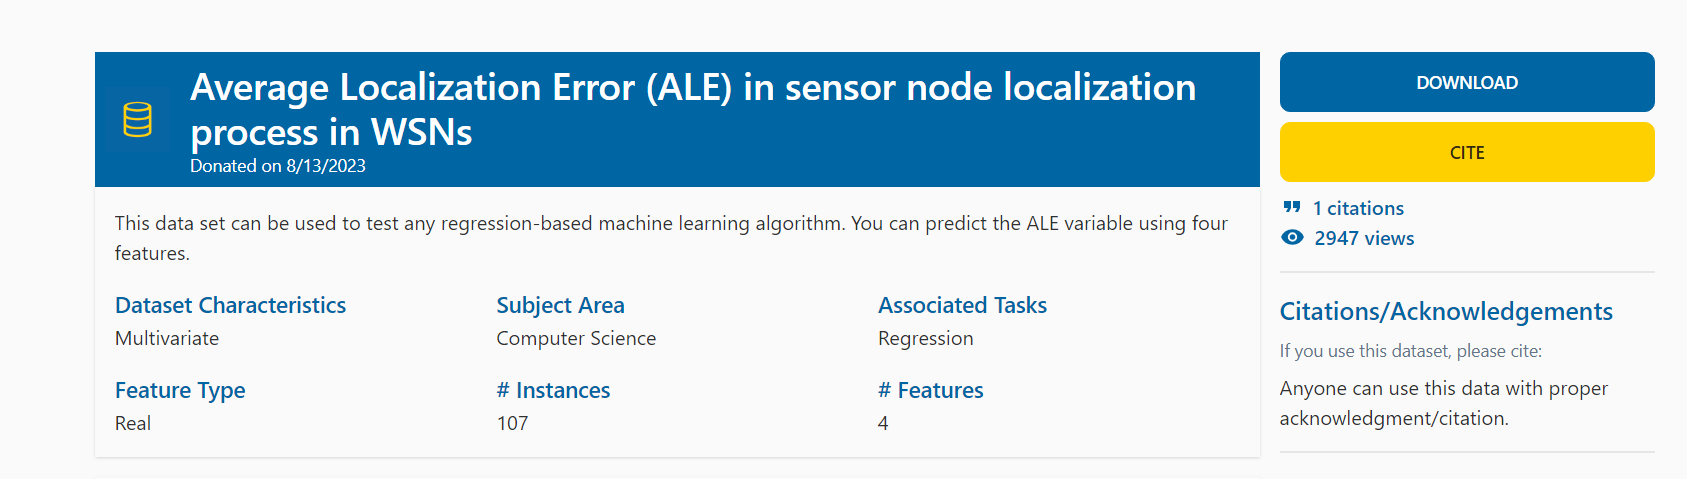

# **Importing and Pre-processing**

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

df = pd.read_csv("/content/mcs_ds_edited_iter_shuffled.csv")

In [13]:
df.head()

,anchor_ratio,trans_range,node_density,iterations,ale,sd_ale
0,30,15,200,40,0.773546,0.250555
1,15,15,100,70,0.911941,0.498329
2,30,15,100,50,0.814867,0.255546
3,15,20,100,20,1.435332,0.394603
4,30,15,100,40,1.265909,0.302943


In [17]:
df.dtypes

anchor_ratio      int64
trans_range       int64
node_density      int64
iterations        int64
ale             float64
sd_ale          float64
dtype: object

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   anchor_ratio  107 non-null    int64  
 1   trans_range   107 non-null    int64  
 2   node_density  107 non-null    int64  
 3   iterations    107 non-null    int64  
 4   ale           107 non-null    float64
 5   sd_ale        107 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 5.1 KB


checking evaluation: data type is good for the model since its features are all in numerical and not categorical. No need to convert.

In [16]:
df.drop(columns=['sd_ale'])

,anchor_ratio,trans_range,node_density,iterations,ale
0,30,15,200,40,0.773546
1,15,15,100,70,0.911941
2,30,15,100,50,0.814867
3,15,20,100,20,1.435332
4,30,15,100,40,1.265909
...,...,...,...,...,...
102,18,23,100,20,1.287472
103,14,17,200,60,0.899102
104,15,20,100,50,1.171140
105,20,20,100,40,1.234493


I dropped the sd_ale column since it was just a computation of standard deviation of computed ALE, which is not the focus of this prediction model.

# **Creating a base model with and improving it by standardizing the dataset**

In [22]:
# Assigning input variables and target variable
X = df.drop(columns=["ale"])
y = df["ale"]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the input features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Building the neural network model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1)
])

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)

# Evaluating the model using MSE and MAE
y_pred_nn = model.predict(X_test_scaled).flatten()  # Flatten the predictions
mse_nn = mean_squared_error(y_test, y_pred_nn)
print("Mean Squared Error (Neural Network):", mse_nn)
mae_nn = mean_absolute_error(y_test, y_pred_nn)
print("Mean Absolute Error (Neural Network):", mae_nn)


1/1 [==============================] - 0s 57ms/step
Mean Squared Error (Neural Network): 0.04671197196552774
Mean Absolute Error (Neural Network): 0.1643952800822324


# **Tuning of layers and neurons (see evaluating small and larger networks)**

In [28]:
# Creating smaller network architecture
smaller_network = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1)
])

# Creating larger network architecture
larger_network = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

# Compiling smaller and larger models
smaller_network.compile(optimizer='adam', loss='mean_squared_error')
larger_network.compile(optimizer='adam', loss='mean_squared_error')

# Training both models
smaller_network.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)
larger_network.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)

# Evaluating both models
y_pred_smaller = smaller_network.predict(X_test_scaled).flatten()
mse_smaller = mean_squared_error(y_test, y_pred_smaller)
mae_smaller = mean_absolute_error(y_test, y_pred_smaller)
print("Mean Squared Error (Smaller Network):", mse_smaller)
print("Mean Absolute Error (Smaller Network):", mae_smaller)

print("\n")

y_pred_larger = larger_network.predict(X_test_scaled).flatten()
mse_larger = mean_squared_error(y_test, y_pred_larger)
mae_larger = mean_absolute_error(y_test, y_pred_larger)
print("Mean Squared Error (Larger Network):", mse_larger)
print("Mean Absolute Error (Larger Network):", mae_larger)


1/1 [==============================] - 0s 56ms/step
Mean Squared Error (Smaller Network): 0.060204914515452713
Mean Absolute Error (Smaller Network): 0.18898231410141406


1/1 [==============================] - 0s 67ms/step
Mean Squared Error (Larger Network): 0.04042079853347134
Mean Absolute Error (Larger Network): 0.1550629464210857


# **Evaluation:** The results indicates that **larger network gives better predictions on the test set** I utilized based on the calculated MSE and MAE of both smaller and larger network models. It means that **larger network may be capturing more complex patterns in the dataset** that I am dealing with, which is a good thing since it means that larger model has improved predictive performance compared to smaller network.


# **CONCLUSION:**

## In conclusion this activity indeed assist me in understanding the use of different models like classification and regression to deal with my own chosen dataset. This very activity can be considered a skill-enhancer when it comes to neural network since both of my classification and regression models utilized it to get a better model performance through tuning. I honestly had a hard time at first but when the things started to make sense, I really enjoyed seeing the correct results that can be reasoned out with correct knowledge. This activity is not just for implementing the models it needs but understanding each and every part of developing a machine learning model and making a use of it in real-life scenarios.